In [2]:

#!pip install ultralytics opencv-python-headless matplotlib --quiet

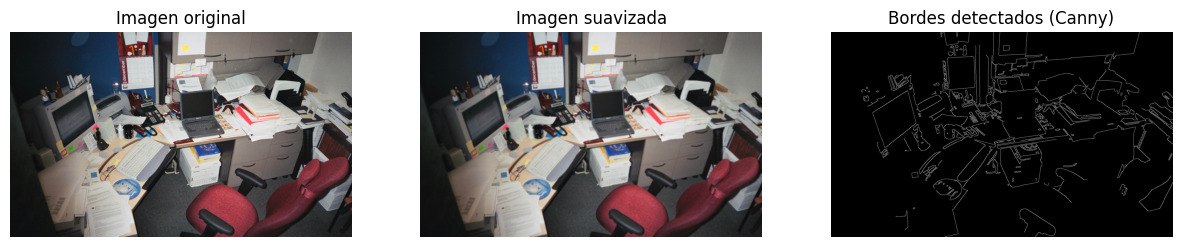

100%|██████████| 6.25M/6.25M [00:00<00:00, 77.4MB/s]



0: 384x640 1 chair, 1 tv, 1 laptop, 3 keyboards, 3 books, 353.8ms
Speed: 11.1ms preprocess, 353.8ms inference, 34.4ms postprocess per image at shape (1, 3, 384, 640)


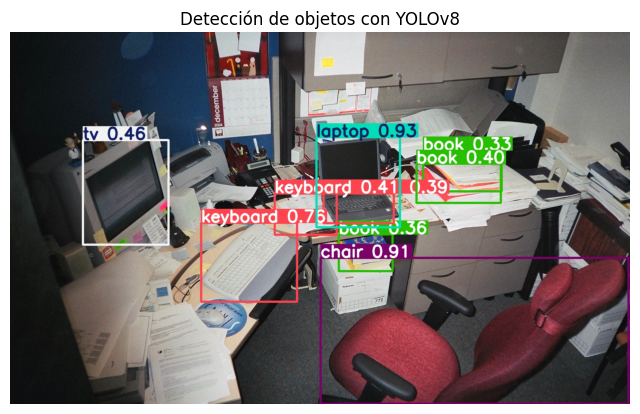

In [7]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

image_path = "/content/image.jpg"  # <-- Cambia esto por la ruta de tu imagen
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"No se encontró la imagen en la ruta: {image_path}")

# 4. Procesamiento de imagen
img_suave = cv2.GaussianBlur(img, (7, 7), 0)
img_canny = cv2.Canny(img_suave, 100, 200)

# 5. Visualiza las tres etapas
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img_suave, cv2.COLOR_BGR2RGB))
plt.title("Imagen suavizada")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_canny, cmap='gray')
plt.title("Bordes detectados (Canny)")
plt.axis('off')
plt.show()

# 6. Detección de objetos con YOLOv8
modelo = YOLO('yolov8n.pt')  # Modelo pequeño y rápido
resultados = modelo(img)
resultados[0].save(filename='yolo_result.jpg')

# 7. Mostrar la imagen con bounding boxes
img_result = cv2.imread('yolo_result.jpg')
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.title("Detección de objetos con YOLOv8")
plt.axis('off')
plt.show()